In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/15_9-19A-CORE.csv", na_values=' ', usecols=['DEPTH', 'CPOR', 'CKHL', 'CGD'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   728 non-null    float64
 1   CKHL    557 non-null    float64
 2   CPOR    593 non-null    float64
 3   CGD     594 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


In [4]:
#Drop nans
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   557 non-null    float64
 1   CKHL    557 non-null    float64
 2   CPOR    557 non-null    float64
 3   CGD     557 non-null    float64
dtypes: float64(4)
memory usage: 21.8 KB


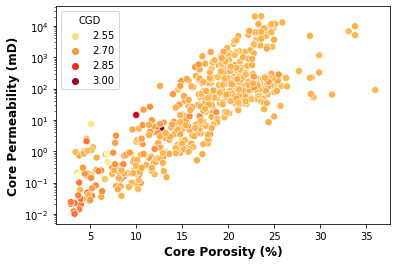

In [5]:
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p.set(yscale='log')
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');



In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x = df['CPOR'].values
y = np.log10(df['CKHL'].values)

In [8]:
y.shape

(557,)

In [9]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [10]:
model = LinearRegression()

In [11]:
model.fit(x, y)

LinearRegression()

In [12]:
r2 = model.score(x, y)
r2

0.7104407167237579

In [13]:
model.intercept_

array([-1.79142803])

In [14]:
model.coef_

array([[0.18299988]])

In [15]:
regression_eq = f'10**({model.coef_[0][0]:.4f} * CPOR + ({model.intercept_[0]:.4f}))'
print(regression_eq)

10**(0.1830 * CPOR + (-1.7914))


In [16]:
x_plot_vals = np.arange(0, 50)
y_pred = model.predict(x_plot_vals.reshape(-1,1))

In [17]:
y_pred_log = 10**y_pred

In [18]:
results_df = pd.DataFrame({'por_vals': x_plot_vals, 'perm_vals': y_pred_log.flatten()})
results_df

,por_vals,perm_vals
0,0,1.616486e-02
1,1,2.463609e-02
2,2,3.754670e-02
3,3,5.722313e-02
4,4,8.721104e-02
5,5,1.329142e-01
6,6,2.025682e-01
7,7,3.087245e-01
8,8,4.705123e-01
9,9,7.170854e-01


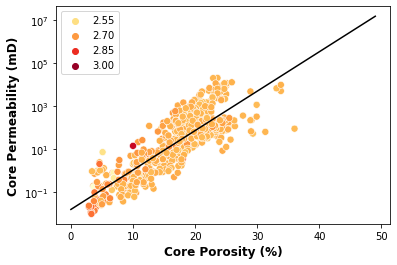

In [19]:
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p = sns.lineplot(x=results_df['por_vals'], y=results_df['perm_vals'], color='black')
p.set(yscale='log')
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');